In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

C:\Users\danie\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
dataset = pd.read_csv(r'C:\Users\danie\Desktop\LSTM\Sentiment\Tweets.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569555072067051520,negative,1.0,longlines,1.0000,US Airways,NaN,countryguyusa,NaN,0,@USAirways 45 minutes and moved two feet in BZ...,NaN,2015-02-22 09:51:25 -0800,World,Eastern Time (US & Canada)
1,568202482746335232,neutral,1.0,NaN,NaN,Delta,NaN,JunkyardFiegs,NaN,0,"@JetBlue It's absolute madness in the west, bu...",NaN,2015-02-18 16:16:43 -0800,NaN,Central Time (US & Canada)
2,569207912251289600,positive,1.0,NaN,NaN,Southwest,NaN,rutty1221,NaN,0,@SouthwestAir DM sent. Thanks for the help!,NaN,2015-02-21 10:51:56 -0800,"San Diego, CA",NaN
3,568388502431395840,negative,1.0,Flight Booking Problems,0.6842,United,NaN,mlipschits,NaN,0,@united hi.I am still waiting for the refund. ...,NaN,2015-02-19 04:35:53 -0800,Jerusalem-London-Antwerp,NaN
4,568186002759671808,negative,1.0,Damaged Luggage,0.3500,Delta,NaN,edgarsantana,NaN,0,@JetBlue so why do you put this at the bottom ...,NaN,2015-02-18 15:11:14 -0800,"ÜT: 40.96513,-73.872957",Eastern Time (US & Canada)


In [10]:
dataset.shape

(14640, 15)

In [11]:
dataset = dataset[['airline_sentiment','text']]
dataset.head()

,airline_sentiment,text
0,negative,@USAirways 45 minutes and moved two feet in BZ...
1,neutral,"@JetBlue It's absolute madness in the west, bu..."
2,positive,@SouthwestAir DM sent. Thanks for the help!
3,negative,@united hi.I am still waiting for the refund. ...
4,negative,@JetBlue so why do you put this at the bottom ...


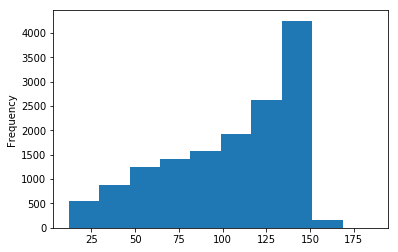

In [15]:
%matplotlib inline
dataset['text'].str.len().plot.hist()

In [16]:
dataset['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

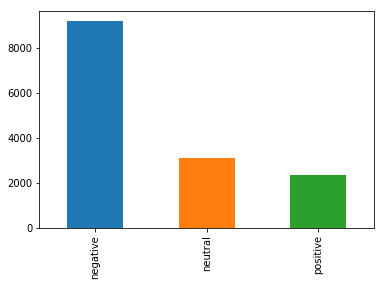

In [17]:
dataset['airline_sentiment'].value_counts().plot.bar()

In [19]:
dataset['text'].apply(lambda x: x.lower())
dataset['text'] = dataset['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]',"",x))
dataset['text'].head()

0    USAirways 45 minutes and moved two feet in BZE...
1    JetBlue Its absolute madness in the west but t...
2             SouthwestAir DM sent Thanks for the help
3    united hiI am still waiting for the refund Thi...
4    JetBlue so why do you put this at the bottom o...
Name: text, dtype: object

In [20]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(dataset['text'].values)

X = tokenizer.texts_to_sequences(dataset['text'].values)
X = pad_sequences(X)
X[:7]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   12,  425,  137,   10,  701,  180, 1427,   15],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   17,   64, 1054, 3092,   15,
           2, 1593,   31,  266,   19,  183,    6,   95,  645, 4598,   10],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   16,  156,  205,   36,    7,    2,   46],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    5, 4599,
          93,   72,  107,    7,    2,  259,   29,   14,  117, 3093,   11,
         285,   86,  117,  233,   19,    4, 1369, 4600,   14,  118,    9],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   

In [21]:
X.shape

(14640, 33)

In [22]:
model = Sequential()
model.add(Embedding(5000, 256, input_length = X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout = 0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout = 0.3, recurrent_dropout =0.2))
model.add(Dense(3, activation = 'softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 256)           1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 33, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [25]:
y = pd.get_dummies(dataset['airline_sentiment']).values
[print(dataset['airline_sentiment'][i], y[i]) for i in range(0,7)]

negative [1 0 0]
neutral [0 1 0]
positive [0 0 1]
negative [1 0 0]
negative [1 0 0]
negative [1 0 0]
neutral [0 1 0]


[None, None, None, None, None, None, None]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [27]:
batch_size = 32
epochs = 10
model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose=2)

Epoch 1/10
 - 65s - loss: 0.6668 - acc: 0.7218
Epoch 2/10
 - 58s - loss: 0.4554 - acc: 0.8230
Epoch 3/10
 - 58s - loss: 0.3690 - acc: 0.8601
Epoch 4/10
 - 58s - loss: 0.3110 - acc: 0.8823
Epoch 5/10
 - 58s - loss: 0.2579 - acc: 0.9033
Epoch 6/10
 - 58s - loss: 0.2172 - acc: 0.9205
Epoch 7/10
 - 58s - loss: 0.1999 - acc: 0.9244
Epoch 8/10
 - 58s - loss: 0.1619 - acc: 0.9410
Epoch 9/10
 - 58s - loss: 0.1484 - acc: 0.9456
Epoch 10/10
 - 59s - loss: 0.1241 - acc: 0.9535


In [32]:
model.save(r'C:\Users\danie\Desktop\LSTM\Sentiment\Sentiment_Model.h5')

In [33]:
prediction = model.predict(X_test)

[print(dataset['text'][i], prediction[i], y_test[i]) for i in range(0,7)]

USAirways 45 minutes and moved two feet in BZE  httptcoAwGjkjIIac [9.99795139e-01 1.94177381e-04 1.07125925e-05] [0 1 0]
JetBlue Its absolute madness in the west but tell me who you like between memgrizz warriors spurs and okcthunder [9.9997103e-01 2.7676317e-05 1.3494155e-06] [1 0 0]
SouthwestAir DM sent Thanks for the help [9.9999666e-01 3.2626547e-06 1.5778288e-07] [1 0 0]
united hiI am still waiting for the refund This is ridiculousOr u approve my tickets or u give me a refundPlease advise wht is going on [0.9719425  0.02652157 0.00153601] [1 0 0]
JetBlue so why do you put this at the bottom of ur baggage report For fun JetBlue airlinequality skytrax httptcotU9JX2jaZN [9.9998295e-01 1.6064474e-05 9.6734470e-07] [1 0 0]
JetBlue I had 2 fight 2 get a credit for the value of my bag but I got it skytrax jetblue corpgreed nevertakeno httptco6MBVJFlpBM [0.7447861  0.15559247 0.0996215 ] [1 0 0]
AmericanAir and is there a delay on our connection to pns [9.5035028e-01 4.9613513e-02 3.61863

[None, None, None, None, None, None, None]